In [75]:
import numpy as np
import matplotlib.pyplot as plt
import re
from glob import glob

### Partition

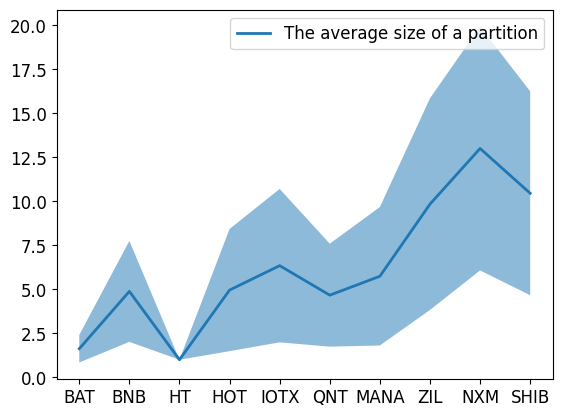

In [112]:
xs = [
    'BAT',
    'BNB',
    'HT',
    'HOT',
    'IOTX',
    'QNT',
    'MANA',
    'ZIL',
    'NXM',
    'SHIB',
]
ys = [
  [1, 1, 2, 2, 3, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 3],
  [1, 1, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 8, 8, 8, 8, 1, 1, 1, 1, 8, 1, 1, 8, 8, 1, 8, 8, 1, 8, 8, 8, 8, 1],
  [1, 2, 10, 10, 10, 1, 2, 10, 10, 10, 1, 10, 10, 10, 1, 10, 10, 10, 10, 1, 10, 10, 10, 10, 1, 1, 1, 1, 1],
  [7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 1, 1, 1, 1, 7, 1, 7, 7],
  [9, 9, 9, 1, 9, 1, 1, 1, 9, 9, 1, 1, 9, 9, 1, 1, 9, 9, 9, 9, 1, 9, 9, 9, 9, 1, 1],
  [1, 2, 14, 14, 14, 14, 1, 1, 1, 1, 14, 1, 14, 14, 14, 14, 14, 14, 14, 14, 1, 2, 1, 14, 14, 14, 14, 14, 1, 1, 14, 14, 14, 14, 14, 14, 14],
  [17, 17, 1, 17, 17, 17, 17, 1, 17, 17, 17, 1, 1, 17, 17, 1, 17, 17, 17, 17, 17, 17, 1, 17, 17, 17, 17, 17, 17, 1, 17, 17, 17, 1, 1, 17, 17, 17, 17, 1],
  [1, 14, 14, 14, 14, 14, 14, 14, 1, 14, 14, 14, 1, 14, 14, 14, 14, 14, 14, 1, 14, 14, 14, 14, 1, 14, 14, 1, 14, 14, 1, 1, 1]
]
# plt.rcParams.update({'font.size': 12})
ys_average = [np.average(x) for x in ys]
ys_min = [np.average(x) - np.std(x) for x in ys]
ys_max = [np.average(x) + np.std(x) for x in ys]
fig, ax = plt.subplots()
ax.set_rasterized(True)
ax.fill_between(xs, ys_min, ys_max, alpha=.5, linewidth=0)
ax.plot(xs, ys_average, linewidth=2.0, label='The average size of a partition')
ax.legend()
# fig.show()
fig.savefig('partition.eps', format='eps')

In [121]:
pre = []
post = []
none = []
names = []
# for file in glob('RQ3/*.txt'):
for file in [f'RQ3/{x}.txt' for x in xs]:
    print(file)
    txt = open(file, 'r').read()
    name = file.split('/')[1][:-4]
    num_pre = 0
    num_post = 0
    num_none = 0
    for line in txt.strip().split('---> DONE <---'):
        line = line.strip()
        if line.startswith('> Pre'):
            num_queries = int(re.search('Query:\s*(\d+)\s*', line).group(1))
            duration = int(re.search('Duration:\s*(\d+)\s*', line).group(1))
            if num_queries > 0:
                num_pre += 1
            else:
                num_none += 1
        if line.startswith('> Post'):
            num_queries = int(re.search('Query:\s*(\d+)\s*', line).group(1))
            duration = int(re.search('Duration:\s*(\d+)\s*', line).group(1))
            if num_queries > 0:
                num_post += 1
            else:
                num_none += 1
    pre.append(num_pre)
    post.append(num_post)
    none.append(num_none)
    names.append(name)

RQ3/BAT.txt
RQ3/BNB.txt
RQ3/HT.txt
RQ3/HOT.txt
RQ3/IOTX.txt
RQ3/QNT.txt
RQ3/MANA.txt
RQ3/ZIL.txt
RQ3/NXM.txt
RQ3/SHIB.txt


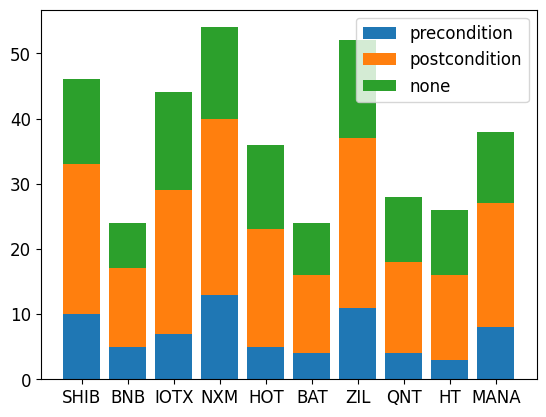

In [118]:
fig, ax = plt.subplots()
bottom = np.zeros(1)
pre = np.array(pre)
ax.bar(names, pre, bottom=bottom, label='precondition')

bottom = bottom + pre
post = np.array(post)
ax.bar(names, post, bottom=bottom, label='postcondition')

bottom = bottom + post
none = np.array(none)
ax.bar(names, none, bottom=bottom, label='none')

ax.legend()